In [1]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서

In [2]:
save_file = './write/1129_leiden_01.h5ad'
adata = sc.read_h5ad(save_file)

In [3]:
adata

AnnData object with n_obs × n_vars = 1983 × 4892
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'sample', 'batch', 'louvain', 'leiden', 'leiden_0.3', 'leiden_0.1', 'leiden_0.05'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_0.1_colors', 'leiden_0.3_colors', 'leiden_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
sc.tl.leiden(adata, key_added = "leiden")


running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


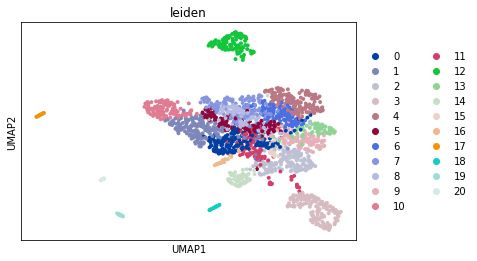

In [5]:
sc.pl.umap(adata, color=['leiden'])


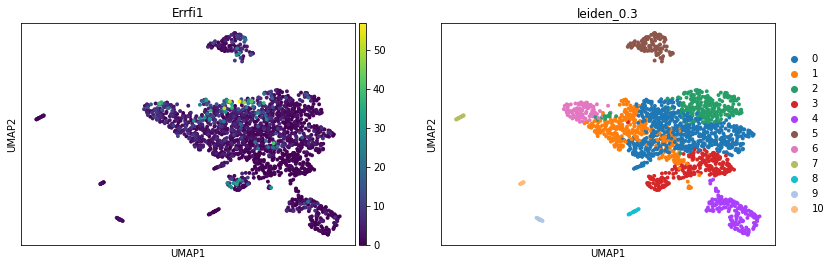

In [6]:
sc.pl.umap(adata, color=['Errfi1', 'leiden_0.3'])


In [7]:
sc.tl.leiden(adata, resolution = 0.2, key_added = "leiden_0.2")


running Leiden clustering
    finished: found 11 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:00)


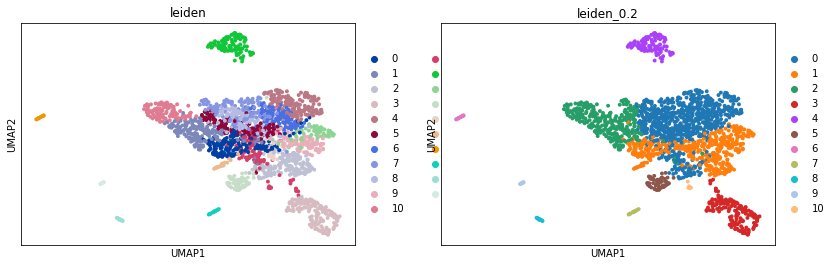

In [8]:
sc.pl.umap(adata, color=['leiden', 'leiden_0.2'])


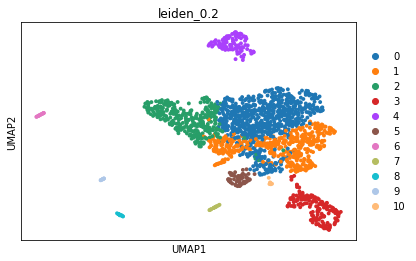

In [9]:
sc.pl.umap(adata, color=['leiden_0.2'])


In [10]:
sc.tl.rank_genes_groups(adata, 'leiden_0.2', method='t-test')


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


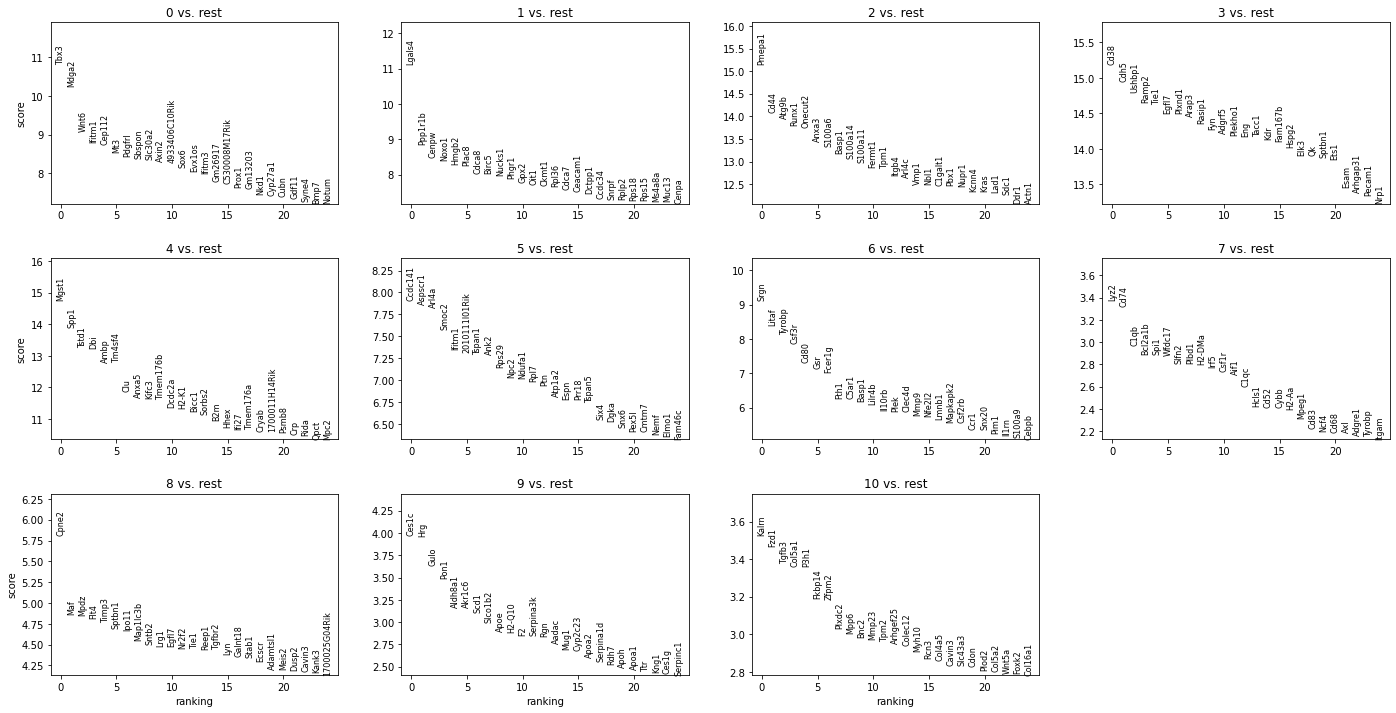

In [11]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


In [12]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)


,0,1,2,3,4,5,6,7,8,9,10
0,Tbx3,Lgals4,Pmepa1,Cd38,Mgst1,Ccdc141,Srgn,Lyz2,Cpne2,Ces1c,Kalrn
1,Mdga2,Ppp1r1b,Cd44,Cdh5,Spp1,Aspscr1,Litaf,Cd74,Maf,Hrg,Fzd1
2,Wnt6,Cenpw,Atg9b,Ushbp1,Tstd1,Arl4a,Tyrobp,C1qb,Mpdz,Gulo,Tgfb3
3,Ifitm1,Noxo1,Runx1,Ramp2,Dbi,Smoc2,Csf3r,Bcl2a1b,Flt4,Pon1,Col5a1
4,Cep112,Hmgb2,Onecut2,Tie1,Ambp,Ifitm1,Cd80,Spi1,Timp3,Aldh8a1,P3h1
5,Mt3,Plac8,Anxa3,Egfl7,Tm4sf4,2010111I01Rik,Gsr,Wfdc17,Sptbn1,Akr1c6,Fkbp14
6,Pdgfrl,Cdca8,S100a6,Plxnd1,Clu,Tspan1,Fcer1g,Slfn2,Ipo11,Scd1,Zfpm2
7,Sbspon,Birc5,Basp1,Arap3,Anxa5,Ank2,Fth1,Plbd1,Map1lc3b,Slco1b2,Plxdc2
8,Slc30a2,Nucks1,S100a14,Rasip1,Kifc3,Rps29,C5ar1,H2-DMa,Sntb2,Apoe,Mpp6
9,Axin2,Phgr1,S100a11,Fyn,Tmem176b,Npc2,Basp1,Irf5,Lrg1,H2-Q10,Bnc2


In [13]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,...,6_n,6_p,7_n,7_p,8_n,8_p,9_n,9_p,10_n,10_p
0,Tbx3,3.917038e-26,Lgals4,9.371795e-26,Pmepa1,7.825960e-40,Cd38,4.590867e-33,Mgst1,2.262849e-27,...,Srgn,2.798524e-07,Lyz2,0.004932,Cpne2,0.000082,Ces1c,0.003235,Kalrn,0.009614
1,Mdga2,1.107504e-23,Ppp1r1b,1.197883e-17,Cd44,9.366693e-36,Cdh5,2.276390e-32,Spp1,1.411772e-25,...,Litaf,6.388706e-07,Cd74,0.005492,Maf,0.000357,Hrg,0.003314,Fzd1,0.010411
2,Wnt6,6.226180e-19,Cenpw,2.311875e-16,Atg9b,2.049634e-35,Ushbp1,5.884697e-32,Tstd1,3.687917e-24,...,Tyrobp,1.118162e-06,C1qb,0.010849,Mpdz,0.000392,Gulo,0.005377,Tgfb3,0.011778
3,Ifitm1,4.482057e-18,Noxo1,3.969095e-16,Runx1,1.241538e-34,Ramp2,1.370320e-31,Dbi,3.719757e-24,...,Csf3r,1.671474e-06,Bcl2a1b,0.012396,Flt4,0.000418,Pon1,0.006764,Col5a1,0.012040
4,Cep112,8.042232e-18,Hmgb2,1.020411e-15,Onecut2,1.168184e-34,Tie1,1.612221e-31,Ambp,4.599695e-23,...,Cd80,3.842096e-06,Spi1,0.012597,Timp3,0.000450,Aldh8a1,0.011359,P3h1,0.012071
5,Mt3,3.903890e-17,Plac8,1.528236e-15,Anxa3,1.929732e-33,Egfl7,3.355917e-31,Tm4sf4,4.715162e-23,...,Gsr,4.776737e-06,Wfdc17,0.012738,Sptbn1,0.000503,Akr1c6,0.011402,Fkbp14,0.015239
6,Pdgfrl,1.133778e-16,Cdca8,6.762854e-15,S100a6,4.822642e-33,Plxnd1,3.944775e-31,Clu,3.976541e-21,...,Fcer1g,5.811478e-06,Slfn2,0.014746,Ipo11,0.000533,Scd1,0.012405,Zfpm2,0.015357
7,Sbspon,1.364860e-16,Birc5,6.454674e-15,Basp1,1.734236e-32,Arap3,5.106705e-31,Anxa5,1.102412e-20,...,Fth1,2.021390e-05,Plbd1,0.014776,Map1lc3b,0.000631,Slco1b2,0.015105,Plxdc2,0.018982
8,Slc30a2,1.660326e-16,Nucks1,9.565667e-15,S100a14,5.922956e-32,Rasip1,9.582059e-31,Kifc3,1.309019e-20,...,C5ar1,2.087060e-05,H2-DMa,0.015026,Sntb2,0.000715,Apoe,0.017377,Mpp6,0.019704
9,Axin2,2.055544e-16,Phgr1,2.341514e-14,S100a11,7.564707e-32,Fyn,1.579469e-30,Tmem176b,1.309878e-20,...,Basp1,2.341681e-05,Irf5,0.015719,Lrg1,0.000746,H2-Q10,0.018144,Bnc2,0.020407


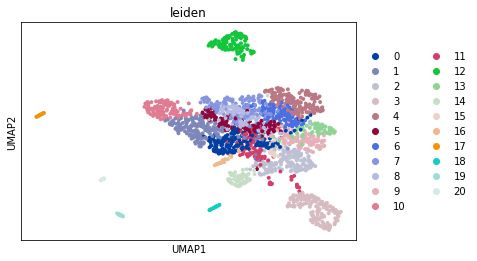

In [14]:
sc.pl.umap(adata, color=['leiden'])


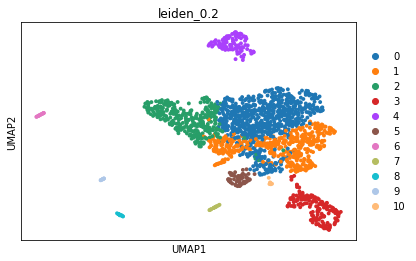

In [15]:
sc.pl.umap(adata, color=['leiden_0.2'])


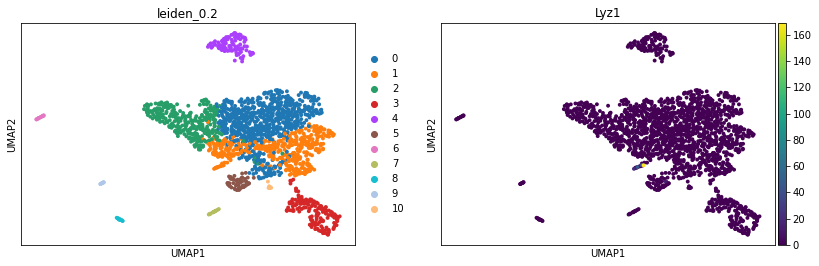

In [16]:
sc.pl.umap(adata, color=['leiden_0.2', 'Lyz1'])


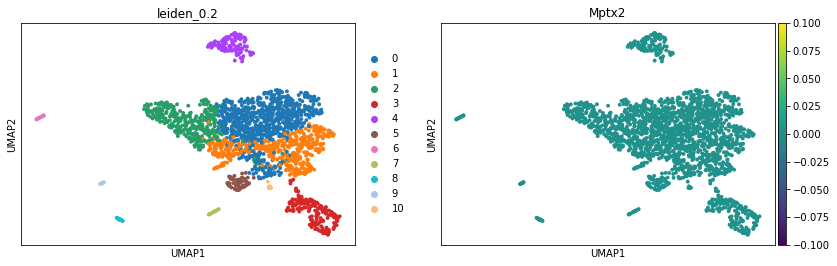

In [17]:
sc.pl.umap(adata, color=['leiden_0.2', 'Mptx2'])


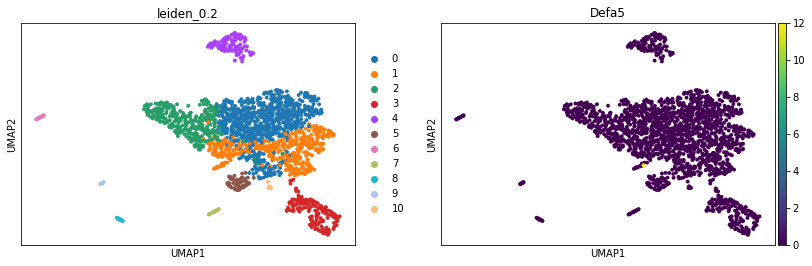

In [20]:
sc.pl.umap(adata, color=['leiden_0.2', 'Defa5'])


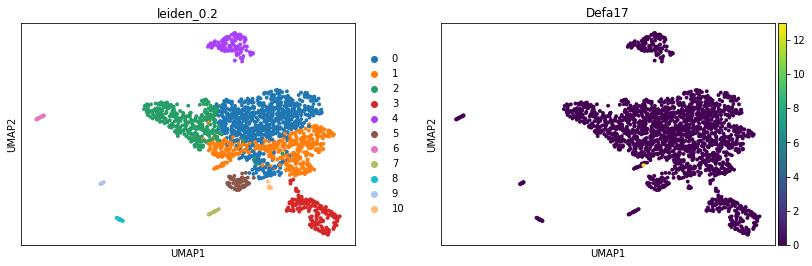

In [23]:
sc.pl.umap(adata, color=['leiden_0.2', 'Defa17'])


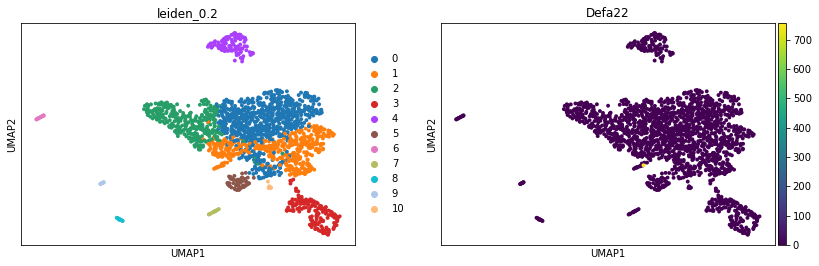

In [24]:
sc.pl.umap(adata, color=['leiden_0.2', 'Defa22'])


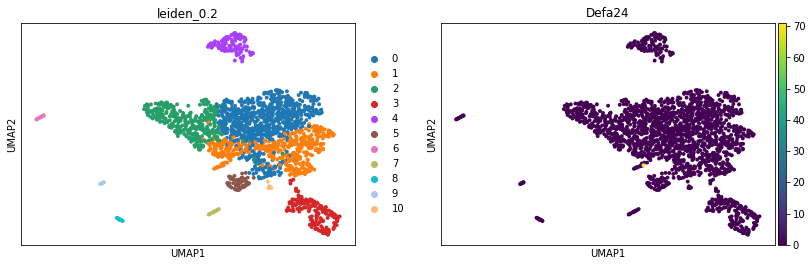

In [25]:
sc.pl.umap(adata, color=['leiden_0.2', 'Defa24'])


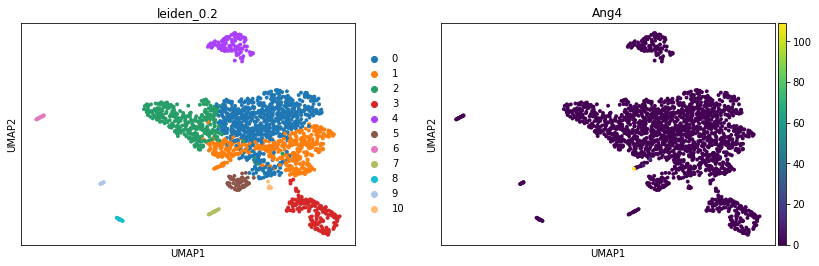

In [26]:
sc.pl.umap(adata, color=['leiden_0.2', 'Ang4'])


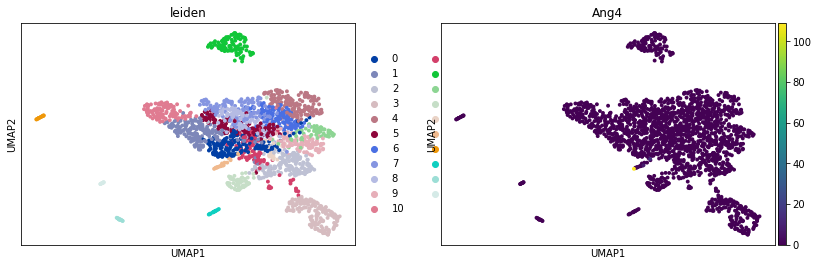

In [27]:
sc.pl.umap(adata, color=['leiden', 'Ang4'])


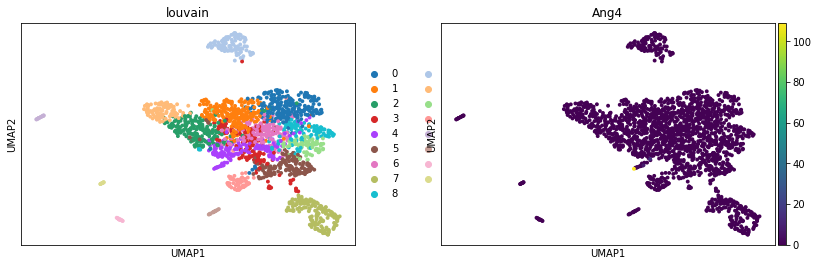

In [28]:
sc.pl.umap(adata, color=['louvain', 'Ang4'])


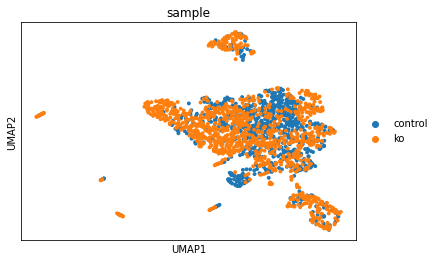

In [18]:
sc.pl.umap(adata, color=['sample'])


In [ ]:
(DEFA5, DEFA6, REG3A
